In [11]:
#| export
import sys
sys.path.append('..')
import pandas as pd
import foodcosts.core as core
import datetime

In [12]:
#| default_exp latem

In [13]:
core.get_shop_names()

config.ini file available... using that


['La Hulpe',
 'Fort Jaco',
 'Woluwe',
 'Tongres',
 'Wemmel',
 'CHATELAIN',
 'OVERIJSE',
 'LATEM']

In [14]:
chicken_sales_latem_woluwe = core.get_sales_by_day(core.get_previous_n_day(1), core.get_previous_n_day(-1), ['Woluwe','LATEM'], 18191)
chicken_sales_latem_woluwe
# 40977

df_chicken_sales = pd.DataFrame(
    chicken_sales_latem_woluwe,
    columns=['shop','date','product','qty_sold','rev']
)

df_chicken_sales.fillna(value=0, inplace=True)
df_chicken_sales.set_index('date', inplace=True)

config.ini file available... using that


In [15]:
import matplotlib.pyplot as plt

def plot_dataframe(df):
    ax = df.plot()
    ax.set_xlabel('Date')
    ax.set_ylabel('Revenue')
    ax.set_title('Poulet romarin')
    plt.show()

In [16]:
display(df_chicken_sales)

,shop,product,qty_sold,rev
date,,,,
2023-03-14,Woluwe,POULET AU ROMARIN,2.276,29.36040


In [17]:
display(df_chicken_sales.head())

,shop,product,qty_sold,rev
date,,,,
2023-03-14,Woluwe,POULET AU ROMARIN,2.276,29.36040


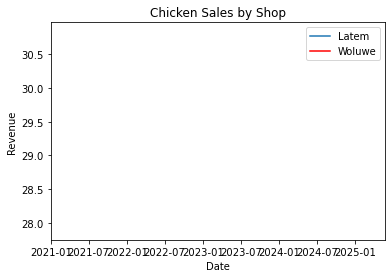

In [18]:
# Select sales data for Latem and Woluwe
latem_sales = df_chicken_sales[df_chicken_sales['shop'] == 'LATEM']
woluwe_sales = df_chicken_sales[df_chicken_sales['shop'] == 'Woluwe']

# Create a Figure and Axes object
fig, ax = plt.subplots()

# Plot the sales data for Latem and Woluwe on the same chart
ax.plot(latem_sales.index, latem_sales['rev'], label='Latem')
ax.plot(woluwe_sales.index, woluwe_sales['rev'], color='red', label='Woluwe')

# Add labels, legend, and title to the chart
ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
ax.legend()
ax.set_title('Chicken Sales by Shop')

# Show the chart
plt.show()

In [35]:
#| export
def did_latem_make_chicken_today():
    range = {
        'lower': core.get_previous_n_day(1),
        'upper': core.get_previous_n_day(0)
    }
    res_kip_rosemarijn = core.get_sales_by_day(range["lower"], range["upper"], ['LATEM'], 18191)
    res_kip_italienne = core.get_sales_by_day(range["lower"], range["upper"], ['LATEM'], 53796)
    return len(res_kip_rosemarijn) > 0 or len(res_kip_italienne) > 0

In [34]:
did_latem_make_chicken_today()

config.ini file available... using that
config.ini file available... using that


True

In [21]:
def get_chicken_sales_lat_10_days():
    chicken_sales_latem_woluwe = core.get_sales_by_day(
        core.get_previous_n_day(18), 
        core.get_previous_n_day(-1), ['LATEM'], 
        18191
    )
    df_chicken_sales = pd.DataFrame(
        chicken_sales_latem_woluwe,
        columns=['shop','date','product','qty_sold','rev']
    )
    df_chicken_sales.fillna(value=0, inplace=True)
    df_chicken_sales.set_index('date', inplace=True)
    return df_chicken_sales

In [22]:
evolution_of_chicken_sales = get_chicken_sales_lat_10_days()

config.ini file available... using that


In [23]:
evolution_of_chicken_sales.rev = evolution_of_chicken_sales.rev.astype(float)

In [24]:
evolution_of_chicken_sales

,shop,product,qty_sold,rev
date,,,,
2023-02-25,LATEM,POULET AU ROMARIN,4.502,58.0758
2023-02-26,LATEM,POULET AU ROMARIN,2.716,35.0364
2023-02-27,LATEM,POULET AU ROMARIN,3.056,39.4224
2023-03-01,LATEM,POULET AU ROMARIN,0.414,5.3406
2023-03-02,LATEM,POULET AU ROMARIN,1.348,17.3892
2023-03-03,LATEM,POULET AU ROMARIN,2.686,34.6494
2023-03-04,LATEM,POULET AU ROMARIN,0.752,9.7008
2023-03-05,LATEM,POULET AU ROMARIN,3.214,41.4606
2023-03-06,LATEM,POULET AU ROMARIN,1.368,17.6472


<AxesSubplot:xlabel='date'>

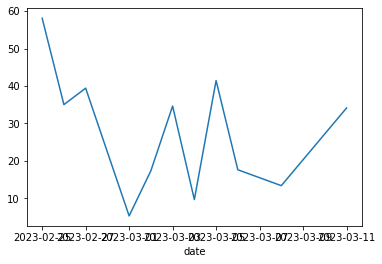

In [25]:
evolution_of_chicken_sales.rev.plot()

# Chocolate mousses

In [26]:
chocolate_mousses = [
    19772
]
chocolate_mouse = core.get_sales_by_day(
    core.get_previous_n_day(30), 
    core.get_today_date_string(), 
    ['Woluwe','LATEM'], 
    chocolate_mousses[0]
)
# 40977

chocolate_mouse_df = pd.DataFrame(
    chocolate_mouse,
    columns=['shop','date','product','qty_sold','rev']
)
chocolate_mouse_df.fillna(value=0, inplace=True)
chocolate_mouse_df.set_index('date', inplace=True)

config.ini file available... using that


In [27]:
chocolate_mouse_df

,shop,product,qty_sold,rev
date,,,,
2023-02-13,LATEM,MOUSSE CHOCOLAT 110G,6.000,18.60000
2023-02-14,LATEM,MOUSSE CHOCOLAT 110G,12.000,37.20000
2023-02-15,LATEM,MOUSSE CHOCOLAT 110G,2.000,6.20000
2023-02-16,LATEM,MOUSSE CHOCOLAT 110G,5.000,15.50000
2023-02-17,LATEM,MOUSSE CHOCOLAT 110G,6.000,18.60000
2023-02-18,LATEM,MOUSSE CHOCOLAT 110G,4.000,12.40000
2023-02-19,LATEM,MOUSSE CHOCOLAT 110G,8.000,24.80000
2023-02-20,LATEM,MOUSSE CHOCOLAT 110G,11.000,34.10000
2023-02-21,LATEM,MOUSSE CHOCOLAT 110G,1.000,3.10000


In [28]:
date_range = pd.date_range(
    datetime.datetime.strptime('2022-10-12', '%Y-%m-%d').date(),
    datetime.datetime.strptime('2022-10-13', '%Y-%m-%d').date()
)

In [29]:
date_range

DatetimeIndex(['2022-10-12', '2022-10-13'], dtype='datetime64[ns]', freq='D')

In [30]:
def missing_sales(start_date, end_date, df):
    date_range = pd.date_range(
        datetime.datetime.strptime(start_date, '%Y-%m-%d').date() if isinstance(start_date, str) else start_date,
        datetime.datetime.strptime(end_date, '%Y-%m-%d').date() if isinstance(end_date, str) else end_date
    )
    df_dates = list(set(df.index))
    missing_dates = [d for d in date_range if d.date() not in df_dates]
    return [str(d) for d in missing_dates]

In [31]:
def nbr_days_product_not_sold_this_month():
    today = datetime.date.today()
    
    first_day = datetime.date(today.year, today.month, 1)
    
    return missing_sales(
        first_day,
        today,
        chocolate_mouse_df.loc[ chocolate_mouse_df['shop'] == 'LATEM']
    )
nbr_days_product_not_sold_this_month()    

['2023-03-06 00:00:00',
 '2023-03-07 00:00:00',
 '2023-03-12 00:00:00',
 '2023-03-13 00:00:00',
 '2023-03-15 00:00:00']

In [ ]:
chocolate_mouse_df.index